## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.541879  1.221388 -0.939365 -1.617158  1.104232 -0.503029
1 -0.688529  0.655700 -1.206524  0.486079 -0.688520  0.396021
2  1.501021 -0.989112 -1.290825  0.553957  0.931154  1.092422
3  1.075410  0.046210 -1.699721 -0.052788 -1.171396  1.269347
4  0.886566  1.208695 -0.616669 -0.379445 -1.283201  0.048008


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9701969	total: 50.7ms	remaining: 50.7s
1:	learn: 0.9593790	total: 51.2ms	remaining: 25.5s
2:	learn: 0.9492063	total: 51.8ms	remaining: 17.2s
3:	learn: 0.9381171	total: 52.4ms	remaining: 13s
4:	learn: 0.9300913	total: 53.1ms	remaining: 10.6s
5:	learn: 0.9214772	total: 53.6ms	remaining: 8.88s
6:	learn: 0.9107346	total: 54.1ms	remaining: 7.67s
7:	learn: 0.9013340	total: 54.6ms	remaining: 6.78s
8:	learn: 0.8921496	total: 55.1ms	remaining: 6.06s
9:	learn: 0.8831491	total: 55.5ms	remaining: 5.49s
10:	learn: 0.8747485	total: 55.9ms	remaining: 5.03s
11:	learn: 0.8657708	total: 56.6ms	remaining: 4.66s
12:	learn: 0.8570099	total: 57.2ms	remaining: 4.34s
13:	learn: 0.8472498	total: 57.7ms	remaining: 4.06s
14:	learn: 0.8412585	total: 58.2ms	remaining: 3.82s
15:	learn: 0.8338071	total: 58.7ms	remaining: 3.61s
16:	learn: 0.8256463	total: 59.3ms	remaining: 3.43s
17:	learn: 0.8180128	total: 59.9ms	remaining: 3.27s
18:	learn: 0.8110984	total: 60.4ms	remaining: 

114:	learn: 0.3653339	total: 104ms	remaining: 801ms
115:	learn: 0.3625610	total: 105ms	remaining: 798ms
116:	learn: 0.3599166	total: 105ms	remaining: 794ms
117:	learn: 0.3571328	total: 106ms	remaining: 791ms
118:	learn: 0.3550125	total: 106ms	remaining: 788ms
119:	learn: 0.3528149	total: 107ms	remaining: 784ms
120:	learn: 0.3494948	total: 107ms	remaining: 780ms
121:	learn: 0.3471477	total: 108ms	remaining: 775ms
122:	learn: 0.3443825	total: 108ms	remaining: 772ms
123:	learn: 0.3419665	total: 109ms	remaining: 768ms
124:	learn: 0.3394201	total: 109ms	remaining: 764ms
125:	learn: 0.3367747	total: 109ms	remaining: 759ms
126:	learn: 0.3342947	total: 110ms	remaining: 755ms
127:	learn: 0.3325232	total: 110ms	remaining: 751ms
128:	learn: 0.3300647	total: 111ms	remaining: 747ms
129:	learn: 0.3275890	total: 111ms	remaining: 743ms
130:	learn: 0.3255724	total: 111ms	remaining: 739ms
131:	learn: 0.3234430	total: 112ms	remaining: 735ms
132:	learn: 0.3210805	total: 112ms	remaining: 731ms
133:	learn: 

271:	learn: 0.1252359	total: 185ms	remaining: 494ms
272:	learn: 0.1243728	total: 185ms	remaining: 493ms
273:	learn: 0.1237315	total: 186ms	remaining: 492ms
274:	learn: 0.1228956	total: 186ms	remaining: 491ms
275:	learn: 0.1221867	total: 187ms	remaining: 490ms
276:	learn: 0.1211539	total: 187ms	remaining: 489ms
277:	learn: 0.1204429	total: 188ms	remaining: 488ms
278:	learn: 0.1197749	total: 188ms	remaining: 486ms
279:	learn: 0.1190832	total: 189ms	remaining: 485ms
280:	learn: 0.1183095	total: 189ms	remaining: 484ms
281:	learn: 0.1174506	total: 189ms	remaining: 482ms
282:	learn: 0.1165976	total: 190ms	remaining: 481ms
283:	learn: 0.1158581	total: 190ms	remaining: 479ms
284:	learn: 0.1151238	total: 191ms	remaining: 478ms
285:	learn: 0.1142864	total: 191ms	remaining: 477ms
286:	learn: 0.1134723	total: 192ms	remaining: 476ms
287:	learn: 0.1128487	total: 192ms	remaining: 474ms
288:	learn: 0.1120093	total: 192ms	remaining: 473ms
289:	learn: 0.1113620	total: 193ms	remaining: 472ms
290:	learn: 

475:	learn: 0.0427425	total: 286ms	remaining: 315ms
476:	learn: 0.0425466	total: 286ms	remaining: 314ms
477:	learn: 0.0422990	total: 287ms	remaining: 313ms
478:	learn: 0.0420556	total: 287ms	remaining: 313ms
479:	learn: 0.0418599	total: 288ms	remaining: 312ms
480:	learn: 0.0416714	total: 288ms	remaining: 311ms
481:	learn: 0.0414830	total: 289ms	remaining: 311ms
482:	learn: 0.0413296	total: 289ms	remaining: 310ms
483:	learn: 0.0411023	total: 290ms	remaining: 309ms
484:	learn: 0.0408735	total: 291ms	remaining: 309ms
485:	learn: 0.0406925	total: 291ms	remaining: 308ms
486:	learn: 0.0405441	total: 291ms	remaining: 307ms
487:	learn: 0.0403156	total: 292ms	remaining: 306ms
488:	learn: 0.0401357	total: 293ms	remaining: 306ms
489:	learn: 0.0399626	total: 293ms	remaining: 305ms
490:	learn: 0.0398196	total: 294ms	remaining: 305ms
491:	learn: 0.0396490	total: 295ms	remaining: 304ms
492:	learn: 0.0394823	total: 295ms	remaining: 304ms
493:	learn: 0.0393247	total: 296ms	remaining: 303ms
494:	learn: 

633:	learn: 0.0236176	total: 369ms	remaining: 213ms
634:	learn: 0.0235933	total: 370ms	remaining: 212ms
635:	learn: 0.0235110	total: 370ms	remaining: 212ms
636:	learn: 0.0234084	total: 371ms	remaining: 211ms
637:	learn: 0.0232964	total: 371ms	remaining: 211ms
638:	learn: 0.0232073	total: 371ms	remaining: 210ms
639:	learn: 0.0230708	total: 372ms	remaining: 209ms
640:	learn: 0.0230025	total: 372ms	remaining: 209ms
641:	learn: 0.0229794	total: 373ms	remaining: 208ms
642:	learn: 0.0229567	total: 373ms	remaining: 207ms
643:	learn: 0.0229045	total: 374ms	remaining: 207ms
644:	learn: 0.0228507	total: 375ms	remaining: 206ms
645:	learn: 0.0228043	total: 375ms	remaining: 206ms
646:	learn: 0.0227257	total: 376ms	remaining: 205ms
647:	learn: 0.0226734	total: 376ms	remaining: 204ms
648:	learn: 0.0225882	total: 377ms	remaining: 204ms
649:	learn: 0.0224811	total: 377ms	remaining: 203ms
650:	learn: 0.0223819	total: 378ms	remaining: 203ms
651:	learn: 0.0223551	total: 378ms	remaining: 202ms
652:	learn: 

829:	learn: 0.0102142	total: 469ms	remaining: 96.1ms
830:	learn: 0.0101863	total: 470ms	remaining: 95.5ms
831:	learn: 0.0101753	total: 470ms	remaining: 95ms
832:	learn: 0.0101270	total: 471ms	remaining: 94.4ms
833:	learn: 0.0100634	total: 471ms	remaining: 93.8ms
834:	learn: 0.0100136	total: 471ms	remaining: 93.2ms
835:	learn: 0.0100034	total: 472ms	remaining: 92.6ms
836:	learn: 0.0099927	total: 479ms	remaining: 93.3ms
837:	learn: 0.0099456	total: 479ms	remaining: 92.7ms
838:	learn: 0.0099188	total: 480ms	remaining: 92.1ms
839:	learn: 0.0098726	total: 480ms	remaining: 91.5ms
840:	learn: 0.0098135	total: 481ms	remaining: 90.9ms
841:	learn: 0.0097613	total: 481ms	remaining: 90.3ms
842:	learn: 0.0097005	total: 481ms	remaining: 89.7ms
843:	learn: 0.0096495	total: 482ms	remaining: 89.1ms
844:	learn: 0.0095926	total: 482ms	remaining: 88.5ms
845:	learn: 0.0095827	total: 483ms	remaining: 87.9ms
846:	learn: 0.0095391	total: 483ms	remaining: 87.3ms
847:	learn: 0.0095137	total: 484ms	remaining: 86

997:	learn: 0.0055071	total: 552ms	remaining: 1.11ms
998:	learn: 0.0054835	total: 553ms	remaining: 553us
999:	learn: 0.0054506	total: 553ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

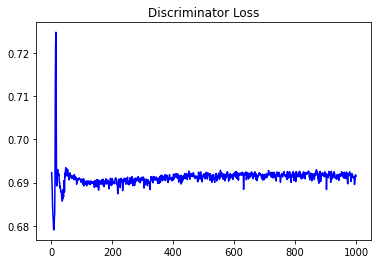

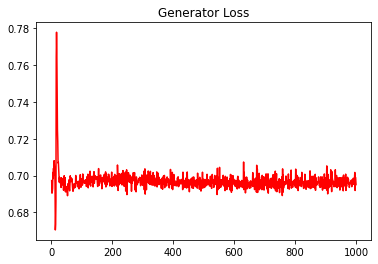

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06285959559684023


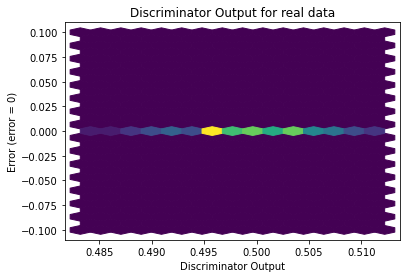

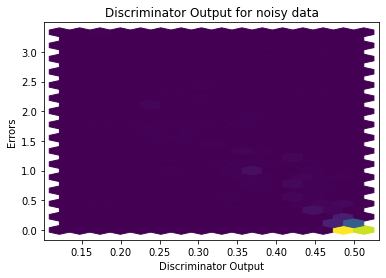

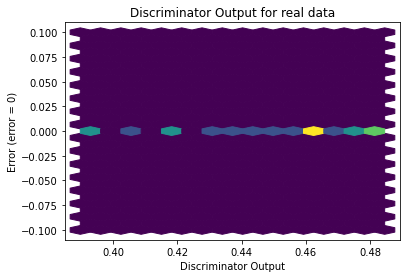

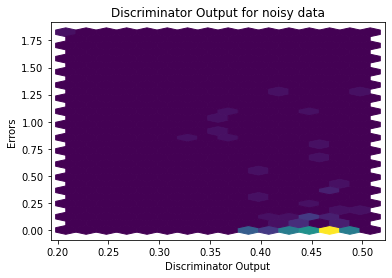

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


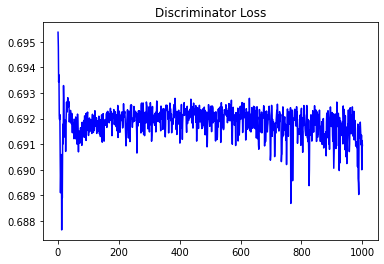

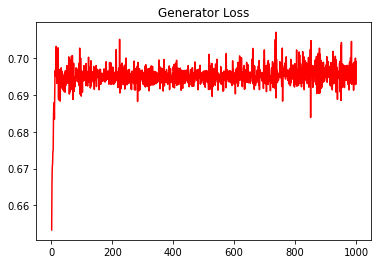

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.035497802832750565


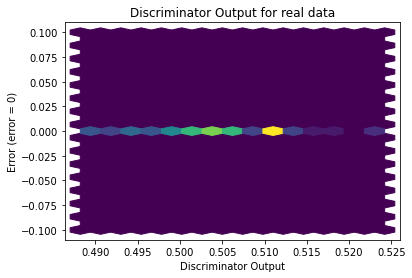

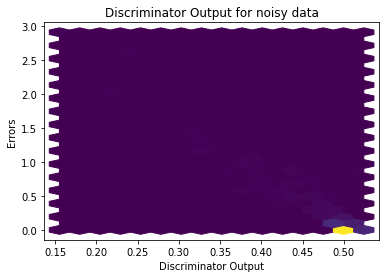

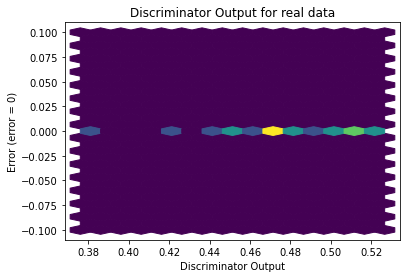

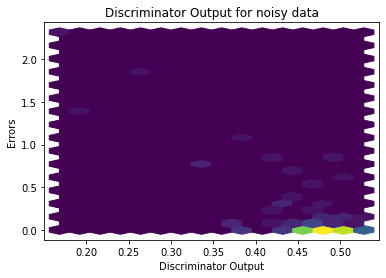

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4560]], requires_grad=True)
